In [1]:
import json
import pandas as pd
import seaborn as sns

In [2]:
def get_percent_correct(path):
    try:
        with open(path, 'r') as f:
            data = json.load(f)
        return data['final_accuracy']
    except:
        print(f"Error reading {path}")

In [24]:
from scipy.stats import norm


def get_one_sided_p_value(p_1, p_2, greater = True):
    p_mean = (p_1 + p_2) / 2
    if greater:
        p_diff = p_1 - p_2
    else:
        p_diff = p_2 - p_1
    
    z = p_diff / (p_mean * (1 - p_mean) * (2 / 100))**0.5
    # compute p-value
    p_value = norm.cdf(z)
    return p_value


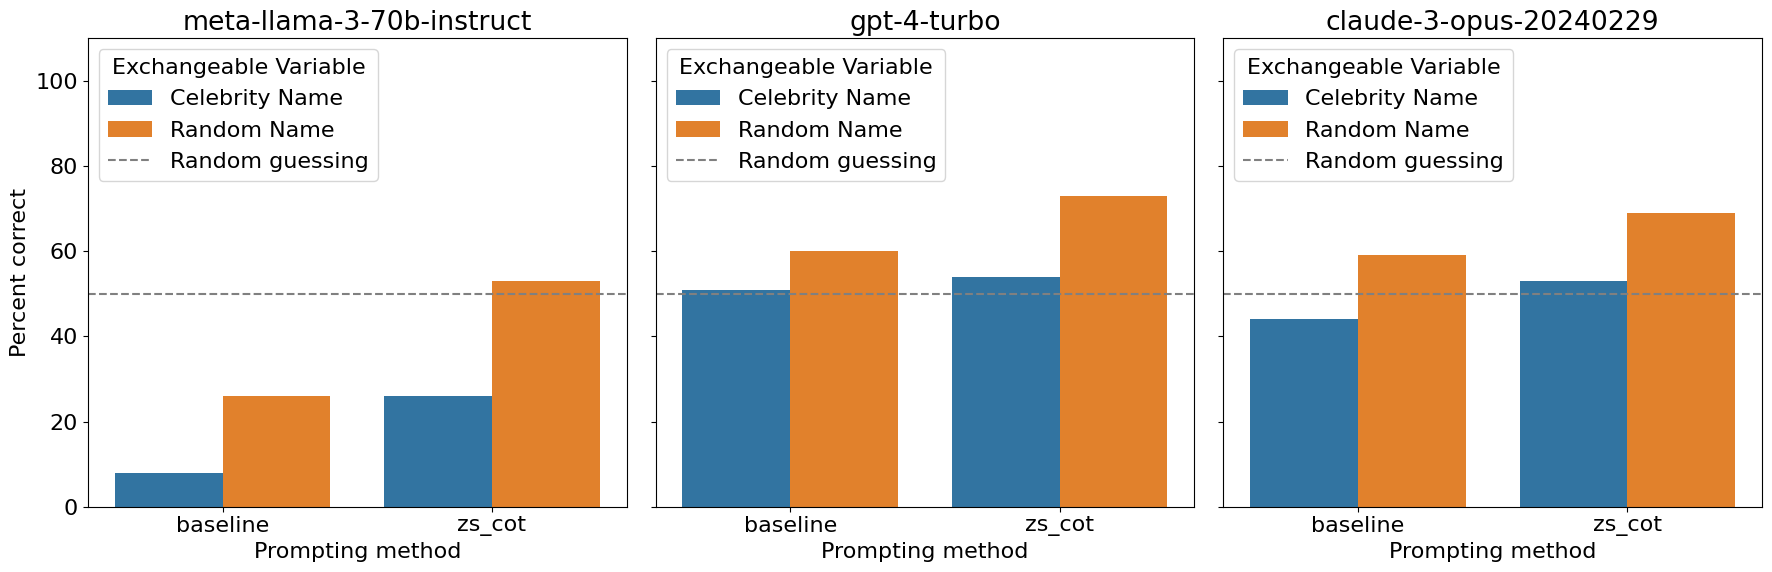

In [38]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

def draw(variant):
    prompting_methods = ['baseline', 'zs_cot']
    models = ['meta-llama-3-70b-instruct', 'gpt-4-turbo', 'claude-3-opus-20240229']

    # Set up a single figure with three subplots (one for each model)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    # draw a comparison plot for each model
    # compute p-value for each pair of data types
    labels = {"gold": "Celebrity Name", "random": "Random Name"}
    p_values = {}
    for i, model in enumerate(models):
        data = {labels['gold']: [], labels['random']: []}
        for prompting_method in prompting_methods:
            for data_type in ['gold', 'random']:
                # Generate file path
                file_path = f'outputs/{model}/responses_{prompting_method}_synthetic_dataset_linda_variant_{variant}_{data_type}.json'
                # Get percent correct from file
                count_correct = get_percent_correct(file_path)
                data[labels[data_type]].append(count_correct)
            p_values[(model, prompting_method)] = get_one_sided_p_value(data[labels['gold']][-1], data[labels['random']][-1], greater=True)

        # Create DataFrame for plotting
        df = pd.DataFrame(data, index=prompting_methods)
        df = df.reset_index().rename(columns={'index': 'prompting_method'})
        df = df.melt(id_vars='prompting_method', var_name='data_type', value_name='count_correct')

        # Plot on the ith subplot
        ax = axes[i]
        sns.barplot(x='prompting_method', y='count_correct', hue='data_type', data=df, ax=ax)
        # fix the y-axis to be between 0 and 100
        ax.set_ylim(0, 110)
        # draw a dotted horizontal line at 50%; mark this line as "random guessing"
        ax.axhline(50, ls='--', color='gray', label='Random guessing')

        ax.set_title(model, )
        ax.set_ylabel("Percent correct" if i == 0 else "")  # Only add y label to first plot
        ax.set_xlabel("Prompting method")
        # change legend labels
        ax.legend(title='Exchangeable Variable', loc='upper left')

    plt.tight_layout()
    plt.show()

draw('four')


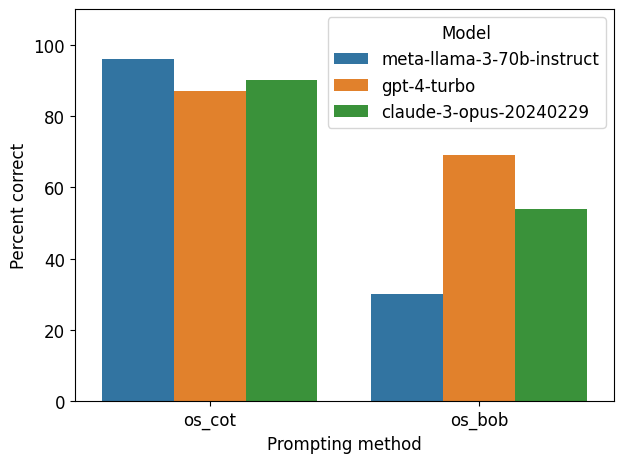

In [52]:
plt.rcParams.update({'font.size': 12})
def draw(variant):
    prompting_methods = ['os_cot', 'os_bob']
    models = ['meta-llama-3-70b-instruct', 'gpt-4-turbo', 'claude-3-opus-20240229']
   
    # draw a comparison plot for each model
    data = {model: [] for model in models}
    for model in models:
        for prompting_method in prompting_methods:
            # Generate file path
            file_path = f'outputs/{model}/responses_{prompting_method}_synthetic_dataset_linda_variant_{variant}_gold.json'
            # Get percent correct from file
            percent_correct = get_percent_correct(file_path)
            data[model].append(percent_correct)

    # Create DataFrame for plotting
    df = pd.DataFrame(data, index=prompting_methods)
    df = df.reset_index().rename(columns={'index': 'prompting_method'})
    df = df.melt(id_vars='prompting_method', var_name='models', value_name='percent_correct')

    # Plot on the ith subplot
    sns.barplot(x='prompting_method', y='percent_correct', hue='models', data=df)
    # fix the y-axis to be between 0 and 100
    plt.ylim(0, 110)
    # draw a dotted horizontal line at 50%; mark this line as "random guessing"
    #plt.axhline(50, ls='--', color='gray', label='Random guessing')

    
    # set y_label
    plt.ylabel("Percent correct")
    plt.xlabel("Prompting method")
    # change legend label font size
    plt.legend(title='Model', loc='upper right')

    plt.tight_layout()
    plt.show()

draw('four')


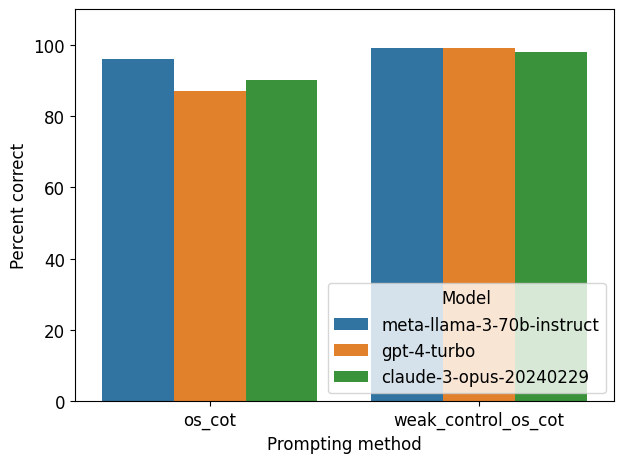

In [55]:
def draw(variant):
    prompting_methods = ['os_cot', 'weak_control_os_cot']
    models = ['meta-llama-3-70b-instruct', 'gpt-4-turbo', 'claude-3-opus-20240229']

    # draw a comparison plot for each model
    data = {model: [] for model in models}
    for model in models:
        for prompting_method in prompting_methods:
            # Generate file path
            file_path = f'outputs/{model}/responses_{prompting_method}_synthetic_dataset_linda_variant_{variant}_gold.json'
            # Get percent correct from file
            percent_correct = get_percent_correct(file_path)
            data[model].append(percent_correct)

    # Create DataFrame for plotting
    df = pd.DataFrame(data, index=prompting_methods)
    df = df.reset_index().rename(columns={'index': 'prompting_method'})
    df = df.melt(id_vars='prompting_method', var_name='models', value_name='percent_correct')

    # Plot on the ith subplot
    sns.barplot(x='prompting_method', y='percent_correct', hue='models', data=df)
    # fix the y-axis to be between 0 and 100
    plt.ylim(0, 110)
    # draw a dotted horizontal line at 50%; mark this line as "random guessing"
    #plt.axhline(50, ls='--', color='gray', label='Random guessing')

    
    # set y_label
    plt.ylabel("Percent correct")
    plt.xlabel("Prompting method")
    # change legend label font size
    plt.legend(title='Model', loc='lower right')

    plt.tight_layout()
    plt.show()

draw('four')